# Clustering - hadronic jets
In questo notebook vogliamo utilizzare l'algoritmo K-means++ per effettuare il clustering di eventi adronici in jets. Utilizziamo le funzioni disponibili nella librearia scikit-learn. Prima di tutto importiamo la libreria.

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Generiamo gli eventi. Immaginiamo che siano eventi bidimensionali, che corrispondono alla rapidità e all'angolo azimutale misurati dal rivelatore su un certo piano.

In [2]:
dataset, classes = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.9, random_state=0)
df = pd.DataFrame(dataset, columns=['eta', 'phi'])

Visualizziamo gli eventi.

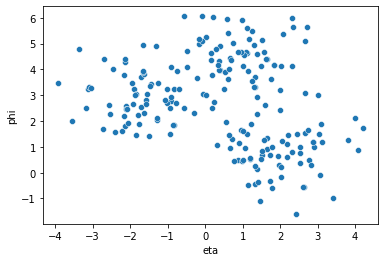

In [3]:
sns.scatterplot(data=df, x="eta", y="phi")
plt.show()

Facciamo il cluster degli eventi usando l'algoritmo K-means++.

In [4]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df)

KMeans frnisce varie informazioni:
- un'etichetta per ciascun punto il cui valore dipende dal cluster;
- il numero di iterazioni necessarie ad arrivare a convergenza;
- i centroidi dei cluster.

In [5]:
kmeans.labels_

array([2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1,
       0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2,
       1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2,
       0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 2, 1,
       0, 2, 1, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 1, 2, 0, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2,
       0, 1, 1, 1, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 2,
       0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1,
       0, 1], dtype=int32)

In [6]:
kmeans.n_iter_

7

In [7]:
kmeans.cluster_centers_

array([[ 0.96914144,  4.52815803],
       [ 1.96747797,  0.82766855],
       [-1.70144342,  2.91029283]])

Possiamo contare quanti punti cadono in ciascun cluster.

In [8]:
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 67, 0: 64, 1: 69})

Visualizziamo i clusters.

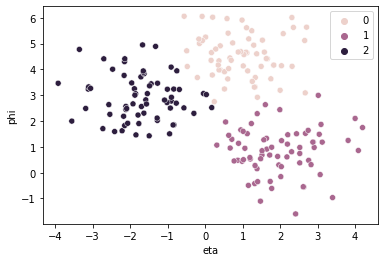

In [9]:
sns.scatterplot(data=df, x="eta", y="phi", hue=kmeans.labels_)
plt.show()

Visualizziamo i clusters con i loro centroidi

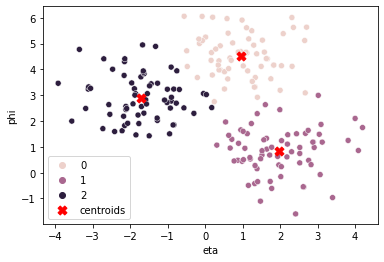

In [10]:
sns.scatterplot(data=df, x="eta", y="phi", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()